In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/train.csv')
test = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/test.csv')
sub = pd.read_csv('/Users/arijitchandra/Downloads/AV_cross_sell/sample_sub.csv')

In [2]:
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in test = 0


In [5]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [7]:
test.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

### Merging Train and Test Data for analysis

In [8]:
train['merge_flag'] = 0
test['Response'] = 9
test['merge_flag'] = 1
df = train.append(test, ignore_index=True)
df.shape

(508146, 13)

In [9]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
color = sns.color_palette()

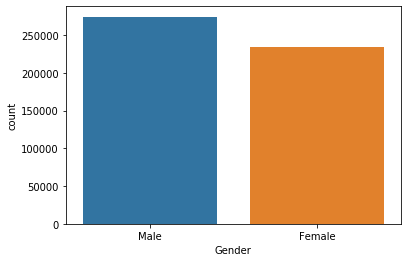

In [10]:
sns.countplot(df.Gender)
plt.show()

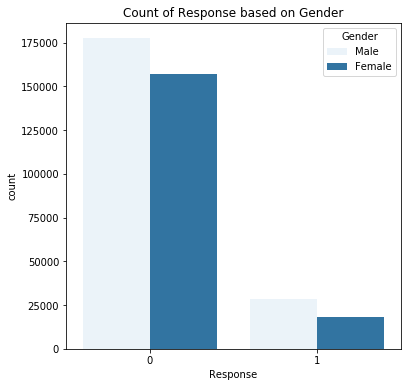

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Gender', data=train, color=color[0])
plt.title("Count of Response based on Gender", fontsize=12)
plt.show()

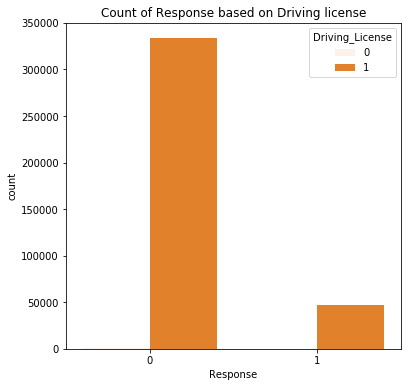

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Driving_License', data=train, color=color[1])
plt.title("Count of Response based on Driving license", fontsize=12)
plt.show()

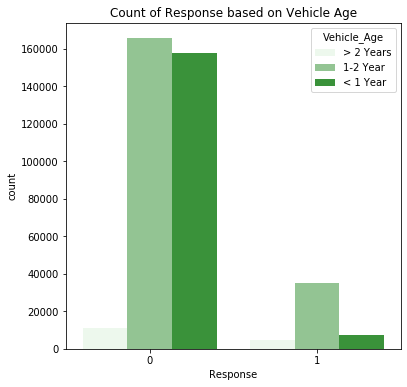

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Vehicle_Age', data=train, color=color[2])
plt.title("Count of Response based on Vehicle Age", fontsize=12)
plt.show()

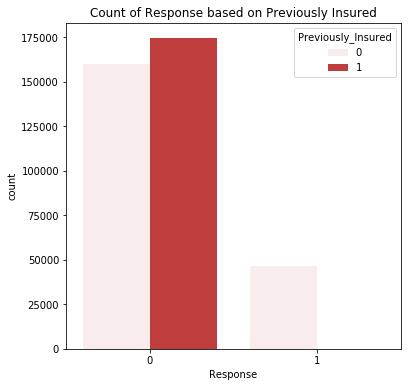

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Previously_Insured', data=train, color=color[3])
plt.title("Count of Response based on Previously Insured", fontsize=12)
plt.show()

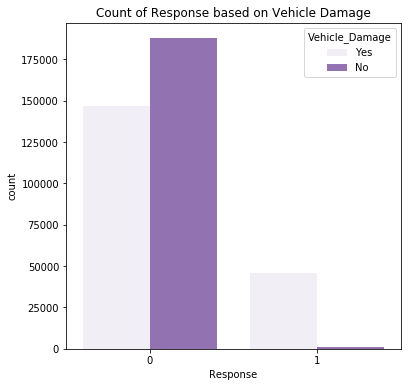

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response, hue='Vehicle_Damage', data=train, color=color[4])
plt.title("Count of Response based on Vehicle Damage", fontsize=12)
plt.show()

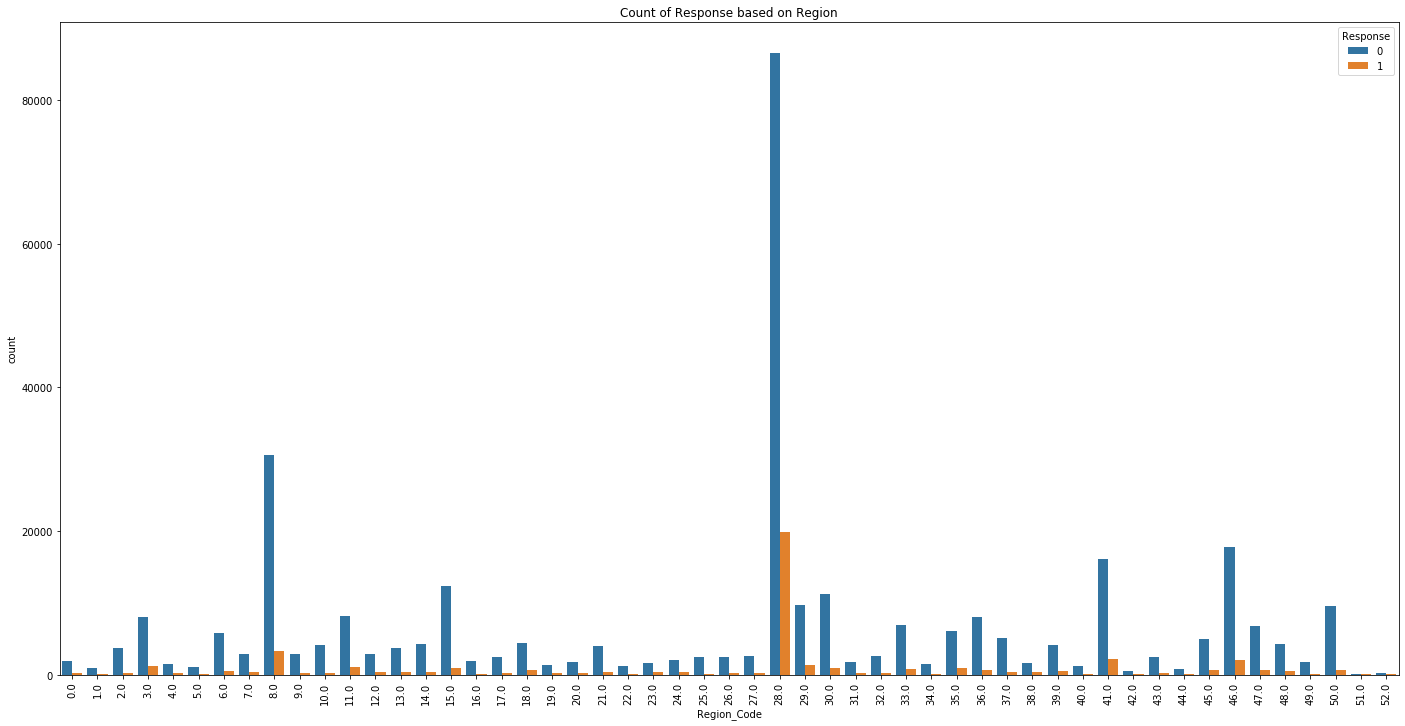

In [16]:
plt.figure(figsize=(24,12))
sns.countplot(train.Region_Code, hue='Response', data=train)
plt.xticks(rotation=90)
plt.title("Count of Response based on Region", fontsize=12)
plt.show()

### Feature extraction by grouping categorical features-

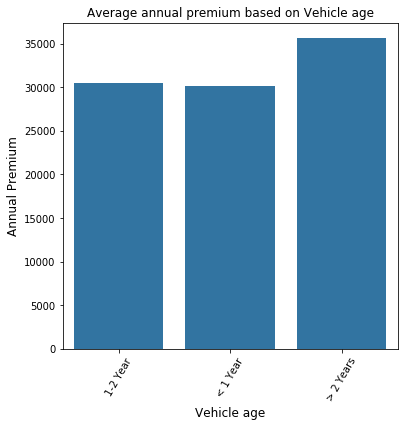

In [17]:
plt.figure(figsize=(6,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Vehicle_Age']).mean().index,
            data=df.groupby(['Vehicle_Age']).mean(), color=color[0])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Vehicle age', fontsize=12)
plt.xticks(rotation=60)
plt.title("Average annual premium based on Vehicle age", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VhAge'] = df.groupby(['Vehicle_Age'])['Annual_Premium'].transform('mean')
#df['MeanAP_VhAge_diff'] = df.Annual_Premium - df.MeanAP_VhAge

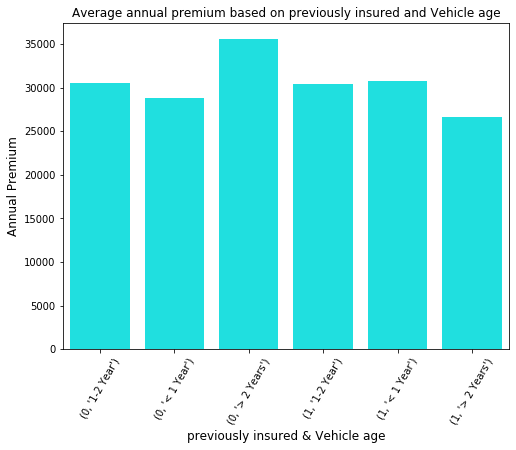

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Previously_Insured','Vehicle_Age']).mean().index,
            data=df.groupby(['Previously_Insured','Vehicle_Age']).mean(), color='cyan')
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('previously insured & Vehicle age', fontsize=12)
plt.xticks(rotation=60)
plt.title("Average annual premium based on previously insured and Vehicle age", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VhAge_PI'] = df.groupby(['Previously_Insured','Vehicle_Age'])['Annual_Premium'].transform('mean')
#df['MeanAP_VhAge_PI_diff'] = df.Annual_Premium - df.MeanAP_VhAge_PI

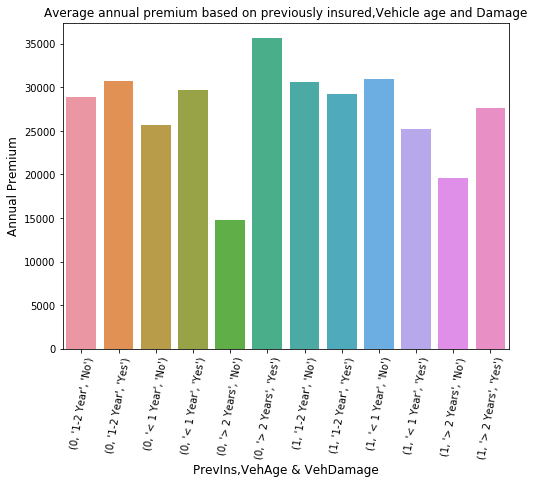

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(y="Annual_Premium",x=df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage']).mean().index,
            data=df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage']).mean())
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('PrevIns,VehAge & VehDamage', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average annual premium based on previously insured,Vehicle age and Damage", fontsize=12)
plt.show()

In [ ]:
#df['MeanAP_VA_PI_VD'] = df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage'])['Annual_Premium'].transform('mean')
#df['MeanAP_VA_PI_VD_diff'] = df.Annual_Premium - df.MeanAP_VA_PI_VD

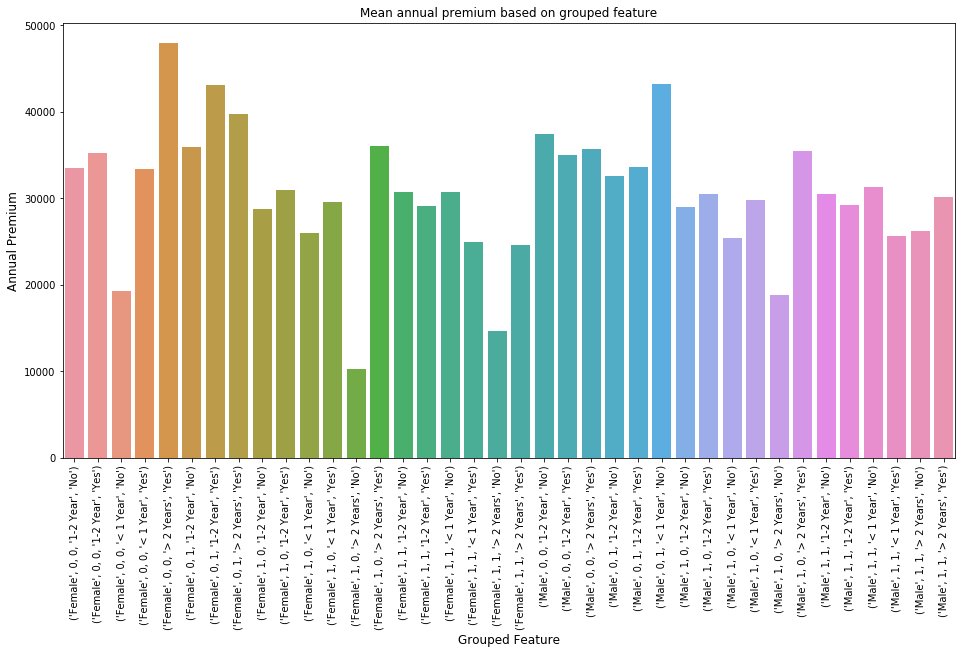

In [22]:
grp_feature = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(16,8))
sns.barplot(y="Annual_Premium",x=df.groupby(grp_feature).mean().index,
            data=df.groupby(grp_feature).mean())
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Mean annual premium based on grouped feature", fontsize=12)
plt.show()

In [23]:
df['MeanAP_grp'] = df.groupby(grp_feature)['Annual_Premium'].transform('mean')
df['MeanAP_grp_norm'] = (df.MeanAP_grp - df.Annual_Premium)/df.Annual_Premium

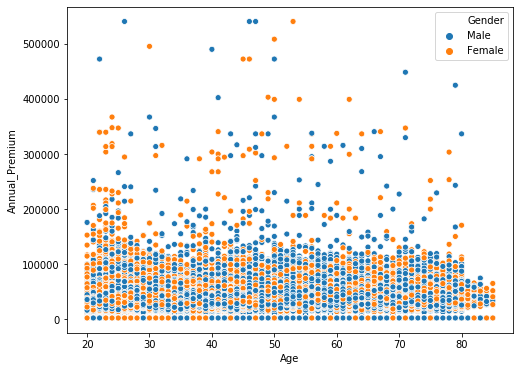

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Annual_Premium',data=df, hue='Gender')
plt.show()

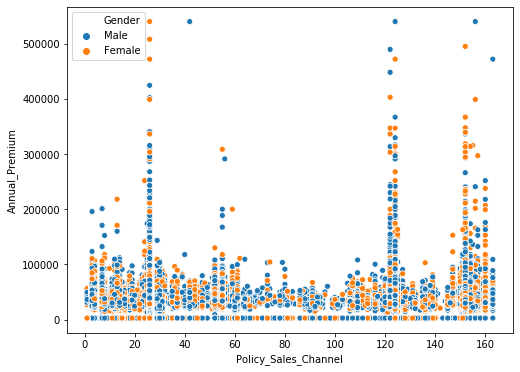

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Annual_Premium', x='Policy_Sales_Channel',data=df, hue='Gender')
plt.show()

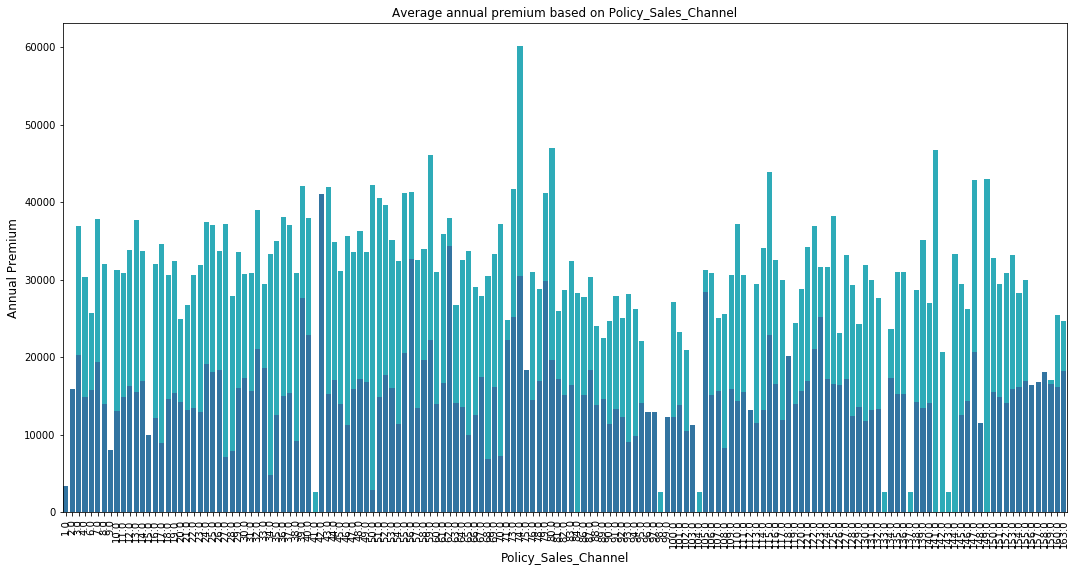

In [26]:
plt.figure(figsize=(18,9))
## Mean distribution
sns.barplot(y="Annual_Premium",x=df.groupby(['Policy_Sales_Channel']).mean().index,
            data=df.groupby(['Policy_Sales_Channel']).mean(), color=color[9])
## Standard deviation
sns.barplot(y="Annual_Premium",x=df.groupby(['Policy_Sales_Channel']).std().index,
            data=df.groupby(['Policy_Sales_Channel']).std(), color=color[0])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Policy_Sales_Channel', fontsize=12)
plt.xticks(rotation=90)
plt.title("Average annual premium based on Policy_Sales_Channel", fontsize=12)
plt.show()

In [27]:
df['AP_PSC_mean'] = df.groupby('Policy_Sales_Channel')['Annual_Premium'].transform('mean')
df['AP_PSC_std'] = df.groupby('Policy_Sales_Channel')['Annual_Premium'].transform('std').fillna(-999)

In [ ]:
#df['AP_PSC_norm'] = (df.AP_PSC_mean - df.Annual_Premium)/df.Annual_Premium

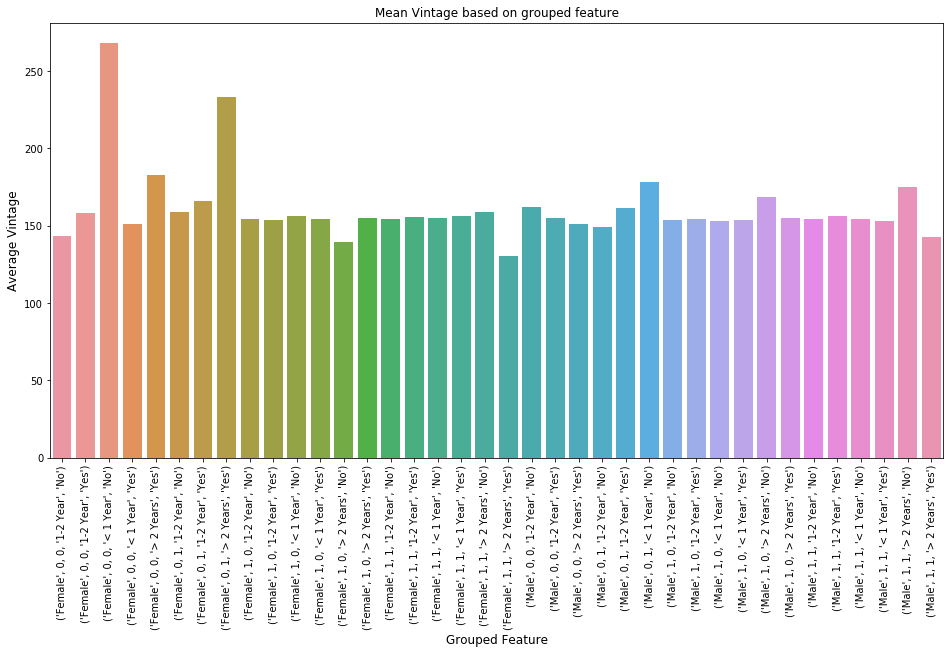

In [28]:
grp_feature = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(16,8))
sns.barplot(y="Vintage",x=df.groupby(grp_feature).mean().index,
            data=df.groupby(grp_feature).mean())
plt.ylabel('Average Vintage', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Mean Vintage based on grouped feature", fontsize=12)
plt.show()

In [29]:
df['MeanVintage_grp'] = df.groupby(grp_feature)['Vintage'].transform('mean')
df['MeanVintage_grp_norm'] = (df.MeanVintage_grp - df.Vintage)/df.Vintage

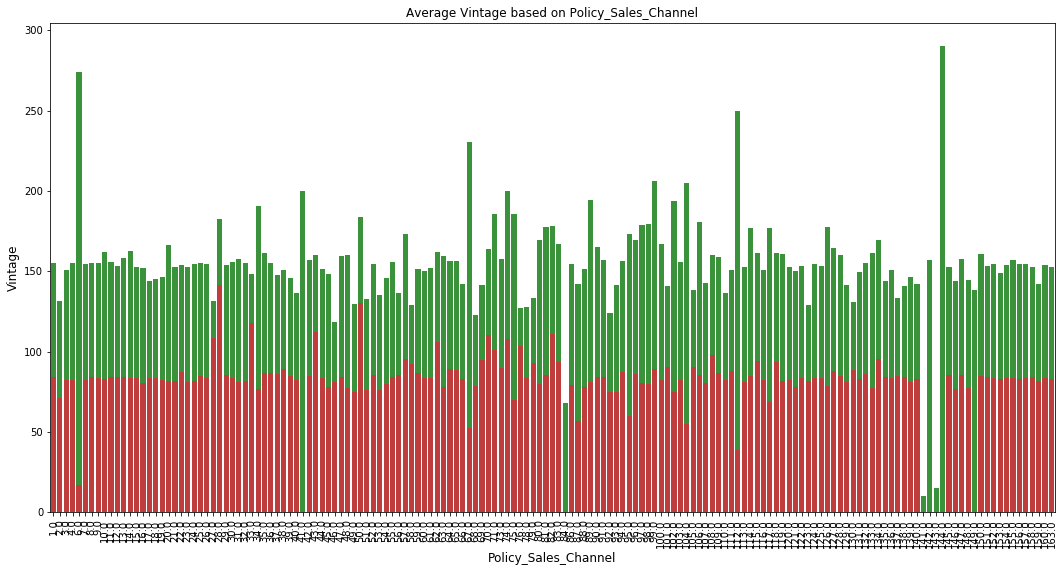

In [30]:
plt.figure(figsize=(18,9))
sns.barplot(y="Vintage",x=df.groupby(['Policy_Sales_Channel']).mean().index,
            data=df.groupby(['Policy_Sales_Channel']).mean(), color=color[2])
sns.barplot(y="Vintage",x=df.groupby(['Policy_Sales_Channel']).std().index,
            data=df.groupby(['Policy_Sales_Channel']).std(), color=color[3])
plt.ylabel('Vintage', fontsize=12)
plt.xlabel('Policy_Sales_Channel', fontsize=12)
plt.xticks(rotation=90)
plt.title("Average Vintage based on Policy_Sales_Channel", fontsize=12)
plt.show()

In [31]:
df['Vin_PSC_mean'] = df.groupby('Policy_Sales_Channel')['Vintage'].transform('mean')
df['Vin_PSC_std'] = df.groupby('Policy_Sales_Channel')['Vintage'].transform('std').fillna(-999)
#df['Vin_PSC_norm'] = (df.Vin_PSC_mean - df.Vintage)/df.Vintage

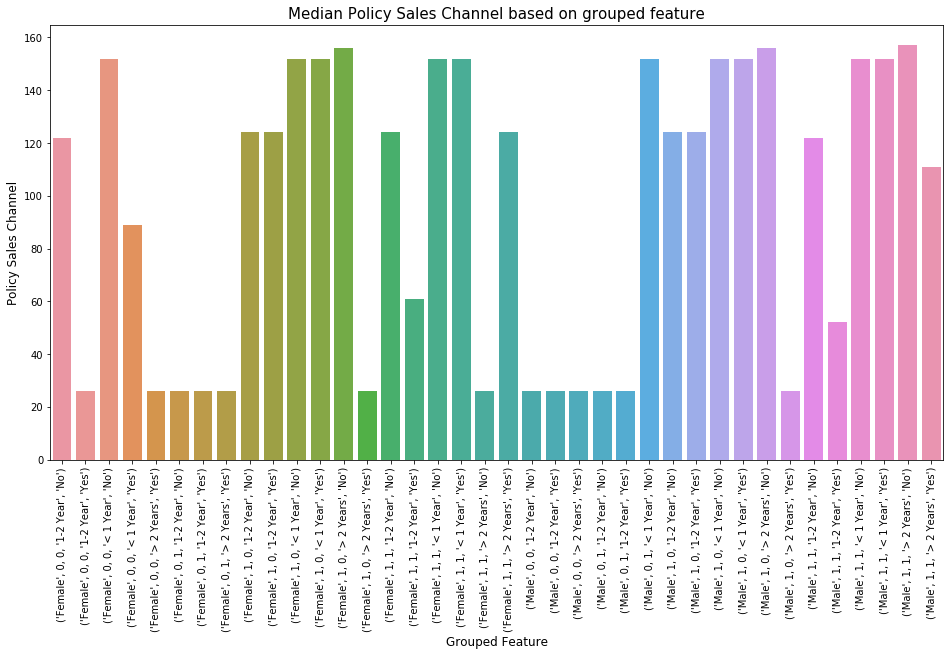

In [32]:
grp_feature = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(16,8))
sns.barplot(y="Policy_Sales_Channel",x=df.groupby(grp_feature).median().index,
            data=df.groupby(grp_feature).median())
plt.ylabel('Policy Sales Channel', fontsize=12)
plt.xlabel('Grouped Feature', fontsize=12)
plt.xticks(rotation=90)
plt.title("Median Policy Sales Channel based on grouped feature", fontsize=15)
plt.show()

In [33]:
df['MedPSC_grp'] = df.groupby(grp_feature)['Policy_Sales_Channel'].transform('median')

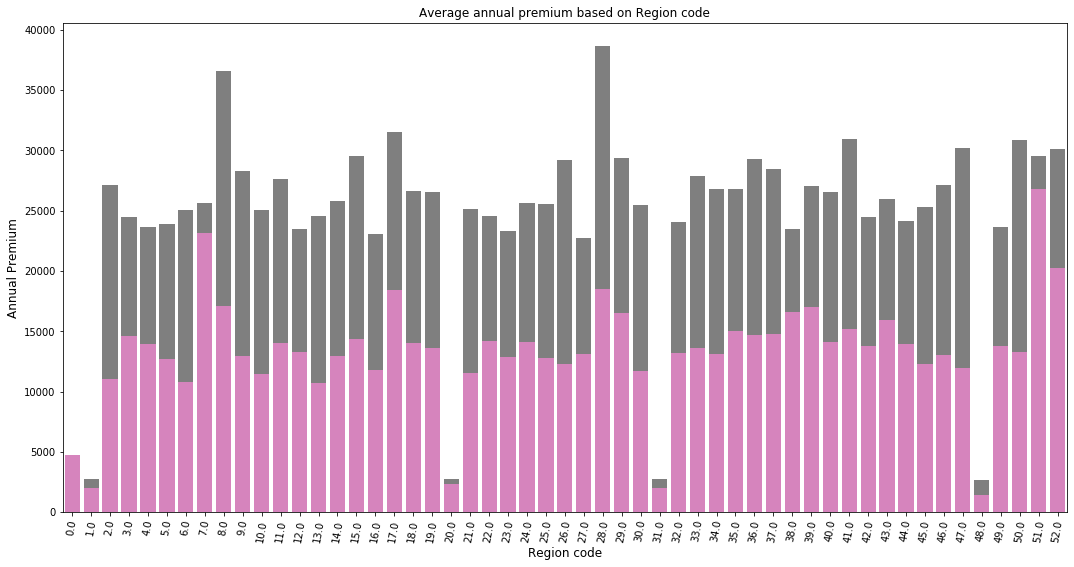

In [34]:
plt.figure(figsize=(18,9))
sns.barplot(y="Annual_Premium",x=df.groupby(['Region_Code']).mean().index,
            data=df.groupby(['Region_Code']).mean(), color=color[7])
sns.barplot(y="Annual_Premium",x=df.groupby(['Region_Code']).std().index,
            data=df.groupby(['Region_Code']).std(), color=color[6])
plt.ylabel('Annual Premium', fontsize=12)
plt.xlabel('Region code', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average annual premium based on Region code", fontsize=12)
plt.show()

In [35]:
df['AP_Rgn_mean'] = df.groupby('Region_Code')['Annual_Premium'].transform('mean')
#df['AP_Rgn_std'] = df.groupby('Region_Code')['Annual_Premium'].transform('std')

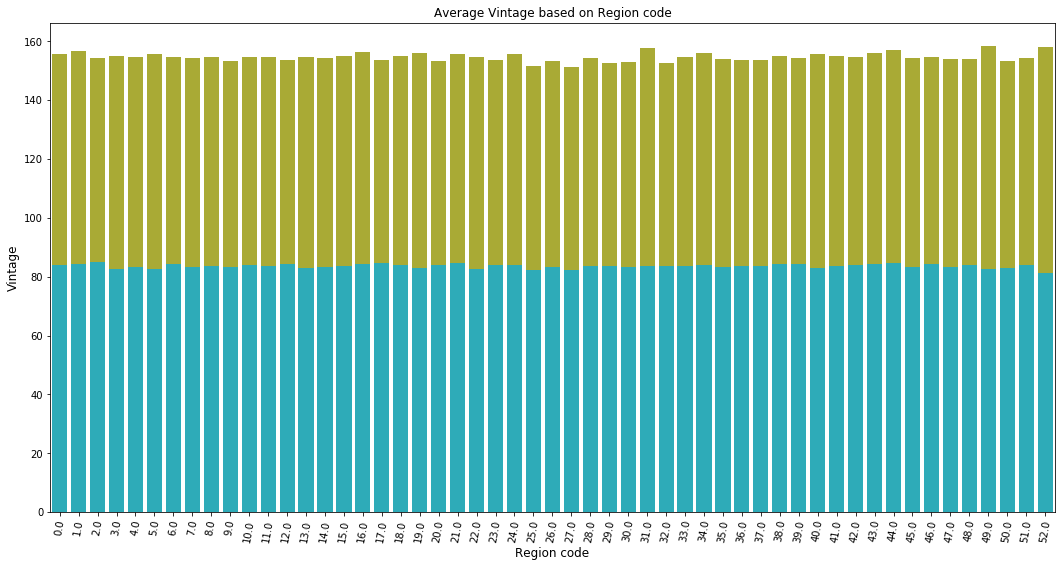

In [36]:
plt.figure(figsize=(18,9))
sns.barplot(y="Vintage",x=df.groupby(['Region_Code']).mean().index,
            data=df.groupby(['Region_Code']).mean(), color=color[8])
sns.barplot(y="Vintage",x=df.groupby(['Region_Code']).std().index,
            data=df.groupby(['Region_Code']).std(), color=color[9])
plt.ylabel('Vintage', fontsize=12)
plt.xlabel('Region code', fontsize=12)
plt.xticks(rotation=80)
plt.title("Average Vintage based on Region code", fontsize=12)
plt.show()

In [37]:
df.corr().style.background_gradient(cmap='Oranges')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,merge_flag,MeanAP_grp,MeanAP_grp_norm,AP_PSC_mean,AP_PSC_std,MeanVintage_grp,MeanVintage_grp_norm,Vin_PSC_mean,Vin_PSC_std,MedPSC_grp,AP_Rgn_mean
id,1.000000,-0.000643,0.001362,0.001325,0.002557,0.001042,-0.002812,-0.000391,0.747897,0.750001,-0.000870,-0.001815,-0.000913,0.000702,0.002497,0.000912,0.001364,-0.001448,0.000753,-0.000922
Age,-0.000643,1.000000,-0.079660,0.041649,-0.255582,0.067392,-0.577043,-0.000010,0.005518,-0.001583,0.247245,0.062459,0.192383,0.536712,-0.127234,-0.000705,-0.040576,0.005169,-0.588128,0.152795
Driving_License,0.001362,-0.079660,1.000000,-0.000202,0.014370,-0.012084,0.042862,-0.000850,0.003180,0.002528,-0.131912,-0.000404,-0.022872,-0.036141,-0.117887,0.000952,-0.000548,-0.000944,0.166502,-0.008201
Region_Code,0.001325,0.041649,-0.000202,1.000000,-0.023991,-0.012012,-0.042223,-0.001568,0.002995,0.002327,0.009090,-0.002388,-0.017500,-0.007058,-0.010456,0.001281,-0.008663,0.006874,-0.033152,-0.027859
Previously_Insured,0.002557,-0.255582,0.014370,-0.023991,1.000000,0.004776,0.221334,0.001664,-0.020183,0.001589,0.052132,-0.080386,0.055516,-0.316265,0.230633,-0.001269,0.039875,-0.001298,0.265626,-0.092284
Annual_Premium,0.001042,0.067392,-0.012084,-0.012012,0.004776,1.000000,-0.114035,-0.000855,0.000445,-0.001004,0.091608,-0.767351,0.305172,0.105830,-0.000341,0.000807,0.004050,0.008552,-0.053126,0.431160
Policy_Sales_Channel,-0.002812,-0.577043,0.042862,-0.042223,0.221334,-0.114035,1.000000,-0.000814,-0.010727,-0.001867,-0.148555,0.022715,-0.373674,-0.512578,0.098475,-0.000098,-0.044168,-0.018010,0.416179,-0.160188
Vintage,-0.000391,-0.000010,-0.000850,-0.001568,0.001664,-0.000855,-0.000814,1.000000,-0.000217,-0.000151,-0.000027,0.002259,0.000245,-0.002225,0.007214,-0.691308,0.018439,0.001435,-0.000853,-0.001021
Response,0.747897,0.005518,0.003180,0.002995,-0.020183,0.000445,-0.010727,-0.000217,1.000000,0.997282,0.005422,0.000680,-0.002039,0.013133,-0.004396,0.001291,-0.001572,-0.000049,-0.009102,0.004296
merge_flag,0.750001,-0.001583,0.002528,0.002327,0.001589,-0.001004,-0.001867,-0.000151,0.997282,1.000000,-0.001051,-0.000103,-0.002047,0.000694,0.002184,0.001168,-0.000356,-0.000139,0.001317,-0.000851


### Categorical value treatment -

In [38]:
categorical_feature=['Gender','Vehicle_Age','Vehicle_Damage']

In [39]:
transform_dict={'Gender': {'Female': 0, 'Male': 1},
 'Vehicle_Age': {'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2},
 'Vehicle_Damage': {'No': 0, 'Yes': 1}}
transform_dict

{'Gender': {'Female': 0, 'Male': 1},
 'Vehicle_Age': {'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2},
 'Vehicle_Damage': {'No': 0, 'Yes': 1}}

In [40]:
inverse_transform_dict = {'Gender': {0: 'Female', 1: 'Male'},
 'Vehicle_Age': {1: '1-2 Year', 0: '< 1 Year', 2: '> 2 Years'},
 'Vehicle_Damage': {0: 'No', 1: 'Yes'}}
inverse_transform_dict

{'Gender': {0: 'Female', 1: 'Male'},
 'Vehicle_Age': {1: '1-2 Year', 0: '< 1 Year', 2: '> 2 Years'},
 'Vehicle_Damage': {0: 'No', 1: 'Yes'}}

In [41]:
df.replace(transform_dict, inplace=True)
df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
merge_flag                int64
MeanAP_grp              float64
MeanAP_grp_norm         float64
AP_PSC_mean             float64
AP_PSC_std              float64
MeanVintage_grp         float64
MeanVintage_grp_norm    float64
Vin_PSC_mean            float64
Vin_PSC_std             float64
MedPSC_grp              float64
AP_Rgn_mean             float64
dtype: object

In [42]:
train = df[df.merge_flag==0]
test = df[df.merge_flag==1]
train.drop(['merge_flag'], axis=1, inplace=True)
test.drop(['merge_flag','Response'], axis=1, inplace=True)
train.shape, test.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((381109, 22), (127037, 21))

In [43]:
cols_to_drop = ['id']
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)
train.shape,test.shape

((381109, 21), (127037, 20))

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
calc_vif(train)

,variables,VIF
0,Gender,2.265904
1,Age,20.959133
2,Driving_License,522.456295
3,Region_Code,5.019331
4,Previously_Insured,6.897971
5,Vehicle_Age,19.298535
6,Vehicle_Damage,7.334651
7,Annual_Premium,11.047020
8,Policy_Sales_Channel,9.844025
9,Vintage,8.442228


## Distribution of target class

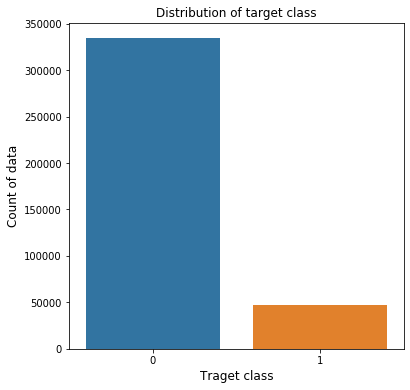

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(train.Response)
plt.xlabel('Traget class', fontsize=12)
plt.ylabel('Count of data', fontsize=12)
plt.xticks(rotation=0)
plt.title("Distribution of target class", fontsize=12)
plt.show()

In [47]:
## percentage of data in each class
pd.DataFrame(train.Response.value_counts()*100/len(train))

,Response
0,87.743664
1,12.256336


In [48]:
feature_names=[i for i in train.columns if i!= 'Response']
X_trn = train[feature_names]
y_trn = train['Response']
X_tst = test[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn,
                                                      test_size=0.2,random_state=17)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((304887, 20), (304887,), (76222, 20), (76222,), (127037, 20))

In [49]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_trn), (class_weight.compute_class_weight('balanced',
                                                 np.unique(y_trn),
                                                 y_trn)).round(2)))
class_weights

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1], y=0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 0.57, 1: 4.08}

In [50]:
from sklearn import metrics

def AUC(actual,pred):
    return metrics.roc_auc_score(actual, pred)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=7,max_features = "sqrt",
                            min_samples_leaf=15,min_samples_split=5, oob_score = True,n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.4f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'
     .format(rf.score(X_valid, y_valid)))

Accuracy of Random Forest classifier on training set: 0.8812
Accuracy of Random Forest classifier on test set: 0.8775


In [52]:
print("AUC on training set:",AUC(y_train, rf.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, rf.predict_proba(X_valid)[:,1]))

AUC on training set: 0.9148505390624664
AUC on validation set: 0.8566697062335658


In [60]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

18


,importance
Vehicle_Damage,0.151649
Previously_Insured,0.126198
Age,0.116629
MeanVintage_grp,0.082177
MeanAP_grp_norm,0.057581
MeanVintage_grp_norm,0.057513
Annual_Premium,0.055742
Vintage,0.055204
AP_PSC_std,0.055039
MeanAP_grp,0.047061


In [57]:
rf.predict_proba(X_tst)[:,1]

array([1.04613954e-05, 3.82043658e-01, 2.33537818e-01, ...,
       5.10606161e-06, 2.68971453e-06, 2.68971453e-06])

In [61]:
import xgboost as xgb

param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree','eta':0.1,'min_child_weight':1,
         'max_depth':20, 'eval_metric':'auc','gamma':.1,'max_delta_step':1,'subsample':.5,
         'alpha': 0.01,'colsample_bytree':.5, 'lambda': .1, 'seed':41}
xgtrain = xgb.DMatrix(X_train[imp_feature], label = y_train)
xgcv = xgb.DMatrix(X_valid[imp_feature], label = y_valid)
xgtest = xgb.DMatrix(X_tst[imp_feature])

watchlist = [(xgcv, 'eval'), (xgtrain, 'train')]
num_round = 300
bst = xgb.train(param, xgtrain, num_round, watchlist, early_stopping_rounds = 10)

gaierror: [Errno 8] nodename nor servname provided, or not known

In [ ]:
print("AUC on training set:",AUC(y_train, bst.predict(xgtrain)))
print("AUC on validation set:",AUC(y_valid, bst.predict(xgcv)))

In [ ]:
pred_xgb=bst.predict(xgtest)

sub['Response'] = pred_xgb
sub.to_csv('submission.csv', index=False)

In [78]:
from catboost import CatBoostClassifier

#clf = CatBoostClassifier(
#    random_seed=41,
#    colsample_bylevel=.1,
#    bagging_temperature=.2,
#    class_names=[0,1,2,3,4,5,6,7,8,9,10],
#    classes_count=11,
#    #class_weights= class_weights,
#    use_best_model=True,
#    iterations=400, 
#    learning_rate=0.18,
#    eval_metric='MultiClass',
#    custom_loss=['Accuracy'],
#    loss_function='MultiClass')

clf = CatBoostClassifier(
    random_seed=41,
    iterations=200, 
    learning_rate=0.1,
    colsample_bylevel=.5,
    bagging_temperature=.5,
    #depth=15,
    subsample= 0.5,
    eval_metric='AUC',
    custom_loss=['AUC'],
    loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        #cat_features=cat_features, 
        eval_set=(X_valid, y_valid),
        plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8361246	best: 0.8361246 (0)	total: 147ms	remaining: 29.2s
1:	test: 0.8387113	best: 0.8387113 (1)	total: 279ms	remaining: 27.6s
2:	test: 0.8429714	best: 0.8429714 (2)	total: 412ms	remaining: 27s
3:	test: 0.8422580	best: 0.8429714 (2)	total: 531ms	remaining: 26s
4:	test: 0.8453528	best: 0.8453528 (4)	total: 652ms	remaining: 25.4s
5:	test: 0.8463854	best: 0.8463854 (5)	total: 773ms	remaining: 25s
6:	test: 0.8484793	best: 0.8484793 (6)	total: 891ms	remaining: 24.6s
7:	test: 0.8479624	best: 0.8484793 (6)	total: 1.01s	remaining: 24.2s
8:	test: 0.8489119	best: 0.8489119 (8)	total: 1.16s	remaining: 24.6s
9:	test: 0.8500249	best: 0.8500249 (9)	total: 1.31s	remaining: 24.9s
10:	test: 0.8497266	best: 0.8500249 (9)	total: 1.4s	remaining: 24.1s
11:	test: 0.8507478	best: 0.8507478 (11)	total: 1.48s	remaining: 23.2s
12:	test: 0.8517456	best: 0.8517456 (12)	total: 1.55s	remaining: 22.4s
13:	test: 0.8520730	best: 0.8520730 (13)	total: 1.65s	remaining: 22s
14:	test: 0.8523353	best: 0.8523353 

118:	test: 0.8600215	best: 0.8600336 (116)	total: 10.3s	remaining: 7.01s
119:	test: 0.8600289	best: 0.8600336 (116)	total: 10.4s	remaining: 6.91s
120:	test: 0.8600303	best: 0.8600336 (116)	total: 10.4s	remaining: 6.82s
121:	test: 0.8600426	best: 0.8600426 (121)	total: 10.5s	remaining: 6.73s
122:	test: 0.8600432	best: 0.8600432 (122)	total: 10.6s	remaining: 6.64s
123:	test: 0.8600407	best: 0.8600432 (122)	total: 10.7s	remaining: 6.54s
124:	test: 0.8600491	best: 0.8600491 (124)	total: 10.8s	remaining: 6.46s
125:	test: 0.8600525	best: 0.8600525 (125)	total: 10.8s	remaining: 6.37s
126:	test: 0.8600658	best: 0.8600658 (126)	total: 10.9s	remaining: 6.27s
127:	test: 0.8600572	best: 0.8600658 (126)	total: 11s	remaining: 6.18s
128:	test: 0.8601224	best: 0.8601224 (128)	total: 11.1s	remaining: 6.09s
129:	test: 0.8601181	best: 0.8601224 (128)	total: 11.2s	remaining: 6.02s
130:	test: 0.8601213	best: 0.8601224 (128)	total: 11.3s	remaining: 5.93s
131:	test: 0.8601133	best: 0.8601224 (128)	total: 11.

In [79]:
print("AUC on training set:",AUC(y_train, clf.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, clf.predict_proba(X_valid)[:,1]))

AUC on training set: 0.8632774760951137
AUC on validation set: 0.8605199104676211


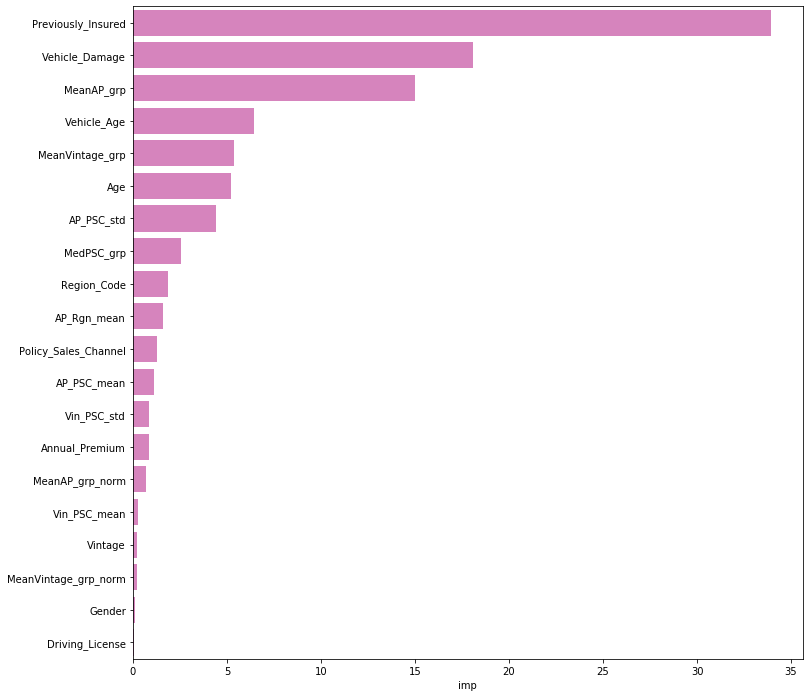

In [80]:
feature_imp=pd.DataFrame(clf.feature_importances_,X_train.columns, columns=['imp'])

plt.figure(figsize=(12,12))
sns.barplot(x='imp',
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False), color=color[6])
plt.show()

In [73]:
pred_cb =clf.predict_proba(X_tst)[:,1]
sub['Response'] = pred_cb
sub.to_csv('submission.csv', index=False)

In [96]:
import lightgbm as lgb
#LightGBM classifier

model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',
                       early_stopping = 50,num_iteration=10000,#num_leaves=80,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=50,max_depth=30,
                       learning_rate=0.01, n_estimators=1000, max_bin=255, subsample_for_bin=5000, 
                       min_split_gain=1, min_child_weight=0.5, min_child_samples=10, subsample=0.5, 
                       subsample_freq=1, colsample_bytree=.5, reg_alpha=0.01, 
                       reg_lambda=1, seed=41, nthread=-1, silent=True)

In [97]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="AUC", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds = 50)

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.836377	training's binary_logloss: 0.370293	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.370291
Training until validation scores don't improve for 50 rounds
[2]	training's auc: 0.839607	training's binary_logloss: 0.368641	valid_1's auc: 0.839632	valid_1's binary_logloss: 0.368638
[3]	training's auc: 0.839229	training's binary_logloss: 0.367034	valid_1's auc: 0.839357	valid_1's binary_logloss: 0.367026
[4]	training's auc: 0.849834	training's binary_logloss: 0.365468	valid_1's auc: 0.84986	valid_1's binary_logloss: 0.365466
[5]	training's auc: 0.84952	training's binary_logloss: 0.363926	valid_1's auc: 0.849449	valid_1's binary_logloss: 0.363925
[6]	training's auc: 0.849302	training's binary_logloss: 0.362402	valid_1's auc: 0.849182	valid_1's binary_logloss: 0.362397
[7]	training's auc: 0.852553	training's binary_logloss: 0.360793	valid_1's auc: 0.852611	valid_1's binary_logloss: 0.360781
[8]	training's auc: 0.854197	training's binary_logloss: 0.35924	valid_1's

[68]	training's auc: 0.857179	training's binary_logloss: 0.306674	valid_1's auc: 0.857244	valid_1's binary_logloss: 0.306513
[69]	training's auc: 0.857176	training's binary_logloss: 0.306167	valid_1's auc: 0.857233	valid_1's binary_logloss: 0.306005
[70]	training's auc: 0.857203	training's binary_logloss: 0.305642	valid_1's auc: 0.857261	valid_1's binary_logloss: 0.305482
[71]	training's auc: 0.857226	training's binary_logloss: 0.305168	valid_1's auc: 0.857276	valid_1's binary_logloss: 0.305008
[72]	training's auc: 0.857243	training's binary_logloss: 0.304667	valid_1's auc: 0.857278	valid_1's binary_logloss: 0.304508
[73]	training's auc: 0.857268	training's binary_logloss: 0.304209	valid_1's auc: 0.857294	valid_1's binary_logloss: 0.304048
[74]	training's auc: 0.857276	training's binary_logloss: 0.303722	valid_1's auc: 0.85729	valid_1's binary_logloss: 0.303562
[75]	training's auc: 0.857279	training's binary_logloss: 0.303241	valid_1's auc: 0.857285	valid_1's binary_logloss: 0.303079
[

[135]	training's auc: 0.85831	training's binary_logloss: 0.283406	valid_1's auc: 0.85827	valid_1's binary_logloss: 0.283166
[136]	training's auc: 0.858321	training's binary_logloss: 0.28318	valid_1's auc: 0.858279	valid_1's binary_logloss: 0.282937
[137]	training's auc: 0.85834	training's binary_logloss: 0.28295	valid_1's auc: 0.858298	valid_1's binary_logloss: 0.282703
[138]	training's auc: 0.858353	training's binary_logloss: 0.282759	valid_1's auc: 0.858303	valid_1's binary_logloss: 0.282512
[139]	training's auc: 0.85837	training's binary_logloss: 0.282557	valid_1's auc: 0.858303	valid_1's binary_logloss: 0.282313
[140]	training's auc: 0.85839	training's binary_logloss: 0.282362	valid_1's auc: 0.858308	valid_1's binary_logloss: 0.282119
[141]	training's auc: 0.858402	training's binary_logloss: 0.282158	valid_1's auc: 0.858331	valid_1's binary_logloss: 0.281911
[142]	training's auc: 0.858413	training's binary_logloss: 0.281967	valid_1's auc: 0.858341	valid_1's binary_logloss: 0.281721

[202]	training's auc: 0.859215	training's binary_logloss: 0.273147	valid_1's auc: 0.858874	valid_1's binary_logloss: 0.272961
[203]	training's auc: 0.859226	training's binary_logloss: 0.273045	valid_1's auc: 0.858883	valid_1's binary_logloss: 0.27286
[204]	training's auc: 0.859238	training's binary_logloss: 0.272942	valid_1's auc: 0.858892	valid_1's binary_logloss: 0.272759
[205]	training's auc: 0.859249	training's binary_logloss: 0.272839	valid_1's auc: 0.858903	valid_1's binary_logloss: 0.272656
[206]	training's auc: 0.859259	training's binary_logloss: 0.272735	valid_1's auc: 0.858913	valid_1's binary_logloss: 0.272553
[207]	training's auc: 0.859255	training's binary_logloss: 0.272681	valid_1's auc: 0.858892	valid_1's binary_logloss: 0.272503
[208]	training's auc: 0.859271	training's binary_logloss: 0.272578	valid_1's auc: 0.858913	valid_1's binary_logloss: 0.2724
[209]	training's auc: 0.85928	training's binary_logloss: 0.272481	valid_1's auc: 0.858914	valid_1's binary_logloss: 0.272

[271]	training's auc: 0.860049	training's binary_logloss: 0.268074	valid_1's auc: 0.859322	valid_1's binary_logloss: 0.268059
[272]	training's auc: 0.86006	training's binary_logloss: 0.268019	valid_1's auc: 0.859325	valid_1's binary_logloss: 0.268008
[273]	training's auc: 0.860071	training's binary_logloss: 0.267965	valid_1's auc: 0.859324	valid_1's binary_logloss: 0.267961
[274]	training's auc: 0.86008	training's binary_logloss: 0.267916	valid_1's auc: 0.859326	valid_1's binary_logloss: 0.267914
[275]	training's auc: 0.860089	training's binary_logloss: 0.267866	valid_1's auc: 0.859329	valid_1's binary_logloss: 0.267869
[276]	training's auc: 0.860098	training's binary_logloss: 0.267823	valid_1's auc: 0.859343	valid_1's binary_logloss: 0.267829
[277]	training's auc: 0.860107	training's binary_logloss: 0.267772	valid_1's auc: 0.859342	valid_1's binary_logloss: 0.267781
[278]	training's auc: 0.86012	training's binary_logloss: 0.26772	valid_1's auc: 0.859347	valid_1's binary_logloss: 0.267

[337]	training's auc: 0.860739	training's binary_logloss: 0.265565	valid_1's auc: 0.85969	valid_1's binary_logloss: 0.265746
[338]	training's auc: 0.860744	training's binary_logloss: 0.265536	valid_1's auc: 0.859692	valid_1's binary_logloss: 0.265719
[339]	training's auc: 0.860752	training's binary_logloss: 0.265505	valid_1's auc: 0.859699	valid_1's binary_logloss: 0.265688
[340]	training's auc: 0.860765	training's binary_logloss: 0.265474	valid_1's auc: 0.859707	valid_1's binary_logloss: 0.26566
[341]	training's auc: 0.860776	training's binary_logloss: 0.265445	valid_1's auc: 0.859714	valid_1's binary_logloss: 0.265634
[342]	training's auc: 0.860782	training's binary_logloss: 0.265425	valid_1's auc: 0.859713	valid_1's binary_logloss: 0.265617
[343]	training's auc: 0.860791	training's binary_logloss: 0.26541	valid_1's auc: 0.859711	valid_1's binary_logloss: 0.265609
[344]	training's auc: 0.860808	training's binary_logloss: 0.265382	valid_1's auc: 0.859715	valid_1's binary_logloss: 0.26

[403]	training's auc: 0.86141	training's binary_logloss: 0.264077	valid_1's auc: 0.85994	valid_1's binary_logloss: 0.2645
[404]	training's auc: 0.86142	training's binary_logloss: 0.264061	valid_1's auc: 0.859943	valid_1's binary_logloss: 0.264487
[405]	training's auc: 0.861428	training's binary_logloss: 0.264045	valid_1's auc: 0.859947	valid_1's binary_logloss: 0.264473
[406]	training's auc: 0.861438	training's binary_logloss: 0.264028	valid_1's auc: 0.859959	valid_1's binary_logloss: 0.264456
[407]	training's auc: 0.861449	training's binary_logloss: 0.26401	valid_1's auc: 0.859955	valid_1's binary_logloss: 0.264446
[408]	training's auc: 0.861459	training's binary_logloss: 0.263995	valid_1's auc: 0.859952	valid_1's binary_logloss: 0.264436
[409]	training's auc: 0.861467	training's binary_logloss: 0.263978	valid_1's auc: 0.859954	valid_1's binary_logloss: 0.264424
[410]	training's auc: 0.861474	training's binary_logloss: 0.263963	valid_1's auc: 0.85996	valid_1's binary_logloss: 0.26441


[470]	training's auc: 0.861991	training's binary_logloss: 0.263196	valid_1's auc: 0.860093	valid_1's binary_logloss: 0.263879
[471]	training's auc: 0.862002	training's binary_logloss: 0.263182	valid_1's auc: 0.860102	valid_1's binary_logloss: 0.263868
[472]	training's auc: 0.862008	training's binary_logloss: 0.263172	valid_1's auc: 0.860101	valid_1's binary_logloss: 0.263862
[473]	training's auc: 0.862017	training's binary_logloss: 0.263161	valid_1's auc: 0.860101	valid_1's binary_logloss: 0.263856
[474]	training's auc: 0.862027	training's binary_logloss: 0.263152	valid_1's auc: 0.860104	valid_1's binary_logloss: 0.263852
[475]	training's auc: 0.862037	training's binary_logloss: 0.263143	valid_1's auc: 0.860108	valid_1's binary_logloss: 0.263847
[476]	training's auc: 0.862048	training's binary_logloss: 0.263136	valid_1's auc: 0.860119	valid_1's binary_logloss: 0.263839
[477]	training's auc: 0.862063	training's binary_logloss: 0.263123	valid_1's auc: 0.860126	valid_1's binary_logloss: 0

[538]	training's auc: 0.862549	training's binary_logloss: 0.262588	valid_1's auc: 0.860217	valid_1's binary_logloss: 0.263561
[539]	training's auc: 0.862556	training's binary_logloss: 0.262582	valid_1's auc: 0.86022	valid_1's binary_logloss: 0.263559
[540]	training's auc: 0.862566	training's binary_logloss: 0.262575	valid_1's auc: 0.86022	valid_1's binary_logloss: 0.263556
[541]	training's auc: 0.862573	training's binary_logloss: 0.262566	valid_1's auc: 0.86022	valid_1's binary_logloss: 0.263553
[542]	training's auc: 0.86258	training's binary_logloss: 0.262558	valid_1's auc: 0.860219	valid_1's binary_logloss: 0.263549
[543]	training's auc: 0.86259	training's binary_logloss: 0.262549	valid_1's auc: 0.860231	valid_1's binary_logloss: 0.263542
[544]	training's auc: 0.862595	training's binary_logloss: 0.26254	valid_1's auc: 0.860234	valid_1's binary_logloss: 0.263535
[545]	training's auc: 0.862604	training's binary_logloss: 0.262534	valid_1's auc: 0.860236	valid_1's binary_logloss: 0.26353

[605]	training's auc: 0.863071	training's binary_logloss: 0.26213	valid_1's auc: 0.860308	valid_1's binary_logloss: 0.263393
[606]	training's auc: 0.863081	training's binary_logloss: 0.262124	valid_1's auc: 0.860309	valid_1's binary_logloss: 0.26339
[607]	training's auc: 0.863087	training's binary_logloss: 0.262117	valid_1's auc: 0.860306	valid_1's binary_logloss: 0.263389
[608]	training's auc: 0.863093	training's binary_logloss: 0.262111	valid_1's auc: 0.860308	valid_1's binary_logloss: 0.263386
[609]	training's auc: 0.863097	training's binary_logloss: 0.262106	valid_1's auc: 0.860309	valid_1's binary_logloss: 0.263383
[610]	training's auc: 0.863105	training's binary_logloss: 0.2621	valid_1's auc: 0.860312	valid_1's binary_logloss: 0.263382
[611]	training's auc: 0.863114	training's binary_logloss: 0.262093	valid_1's auc: 0.860315	valid_1's binary_logloss: 0.263377
[612]	training's auc: 0.863118	training's binary_logloss: 0.262085	valid_1's auc: 0.860315	valid_1's binary_logloss: 0.263

[672]	training's auc: 0.863597	training's binary_logloss: 0.261734	valid_1's auc: 0.860392	valid_1's binary_logloss: 0.263269
[673]	training's auc: 0.863605	training's binary_logloss: 0.261729	valid_1's auc: 0.860394	valid_1's binary_logloss: 0.263267
[674]	training's auc: 0.863617	training's binary_logloss: 0.261723	valid_1's auc: 0.860395	valid_1's binary_logloss: 0.263266
[675]	training's auc: 0.863625	training's binary_logloss: 0.261719	valid_1's auc: 0.860396	valid_1's binary_logloss: 0.263264
[676]	training's auc: 0.863631	training's binary_logloss: 0.261714	valid_1's auc: 0.860394	valid_1's binary_logloss: 0.263263
[677]	training's auc: 0.863643	training's binary_logloss: 0.261708	valid_1's auc: 0.860394	valid_1's binary_logloss: 0.263264
[678]	training's auc: 0.863651	training's binary_logloss: 0.261701	valid_1's auc: 0.860397	valid_1's binary_logloss: 0.26326
[679]	training's auc: 0.863659	training's binary_logloss: 0.261696	valid_1's auc: 0.860397	valid_1's binary_logloss: 0.

[739]	training's auc: 0.864131	training's binary_logloss: 0.261378	valid_1's auc: 0.860446	valid_1's binary_logloss: 0.263187
[740]	training's auc: 0.864137	training's binary_logloss: 0.261372	valid_1's auc: 0.860443	valid_1's binary_logloss: 0.263187
[741]	training's auc: 0.864145	training's binary_logloss: 0.261368	valid_1's auc: 0.86044	valid_1's binary_logloss: 0.263188
[742]	training's auc: 0.864152	training's binary_logloss: 0.261363	valid_1's auc: 0.86044	valid_1's binary_logloss: 0.263185
[743]	training's auc: 0.864159	training's binary_logloss: 0.261359	valid_1's auc: 0.860436	valid_1's binary_logloss: 0.263186
[744]	training's auc: 0.86417	training's binary_logloss: 0.261353	valid_1's auc: 0.860433	valid_1's binary_logloss: 0.263188
[745]	training's auc: 0.864178	training's binary_logloss: 0.261348	valid_1's auc: 0.860436	valid_1's binary_logloss: 0.263187
[746]	training's auc: 0.864187	training's binary_logloss: 0.261344	valid_1's auc: 0.860442	valid_1's binary_logloss: 0.26

[805]	training's auc: 0.864626	training's binary_logloss: 0.261062	valid_1's auc: 0.86049	valid_1's binary_logloss: 0.263132
[806]	training's auc: 0.864637	training's binary_logloss: 0.261056	valid_1's auc: 0.860487	valid_1's binary_logloss: 0.263133
[807]	training's auc: 0.864649	training's binary_logloss: 0.26105	valid_1's auc: 0.86049	valid_1's binary_logloss: 0.263131
[808]	training's auc: 0.864655	training's binary_logloss: 0.261044	valid_1's auc: 0.860485	valid_1's binary_logloss: 0.263133
[809]	training's auc: 0.86466	training's binary_logloss: 0.26104	valid_1's auc: 0.860484	valid_1's binary_logloss: 0.263134
[810]	training's auc: 0.864668	training's binary_logloss: 0.261035	valid_1's auc: 0.860485	valid_1's binary_logloss: 0.263133
[811]	training's auc: 0.864679	training's binary_logloss: 0.26103	valid_1's auc: 0.860486	valid_1's binary_logloss: 0.263133
[812]	training's auc: 0.864686	training's binary_logloss: 0.261025	valid_1's auc: 0.860489	valid_1's binary_logloss: 0.26313

[872]	training's auc: 0.865158	training's binary_logloss: 0.260751	valid_1's auc: 0.860498	valid_1's binary_logloss: 0.263107
[873]	training's auc: 0.865166	training's binary_logloss: 0.260747	valid_1's auc: 0.860498	valid_1's binary_logloss: 0.263107
[874]	training's auc: 0.865169	training's binary_logloss: 0.260743	valid_1's auc: 0.860497	valid_1's binary_logloss: 0.263107
[875]	training's auc: 0.86518	training's binary_logloss: 0.260739	valid_1's auc: 0.860495	valid_1's binary_logloss: 0.263109
[876]	training's auc: 0.865187	training's binary_logloss: 0.260734	valid_1's auc: 0.860493	valid_1's binary_logloss: 0.26311
[877]	training's auc: 0.865195	training's binary_logloss: 0.260729	valid_1's auc: 0.86049	valid_1's binary_logloss: 0.26311
[878]	training's auc: 0.865202	training's binary_logloss: 0.260725	valid_1's auc: 0.860487	valid_1's binary_logloss: 0.263112
[879]	training's auc: 0.865209	training's binary_logloss: 0.260721	valid_1's auc: 0.860488	valid_1's binary_logloss: 0.263

LGBMClassifier(colsample_bytree=0.5, early_stopping=50, is_enable_sparse='true',
               learning_rate=0.01, max_bin=255, max_depth=30,
               min_child_samples=10, min_child_weight=0.5, min_data_in_leaf=50,
               min_split_gain=1, n_estimators=1000, nthread=-1,
               num_iteration=10000, objective='binary', reg_alpha=0.01,
               reg_lambda=1, seed=41, subsample=0.5, subsample_for_bin=5000,
               subsample_freq=1, tree_learner='data')

In [98]:
print("AUC on training set:",AUC(y_train, model.predict_proba(X_train)[:,1]))
print("AUC on validation set:",AUC(y_valid, model.predict_proba(X_valid)[:,1]))

AUC on training set: 0.86505589571711
AUC on validation set: 0.8605164237125849


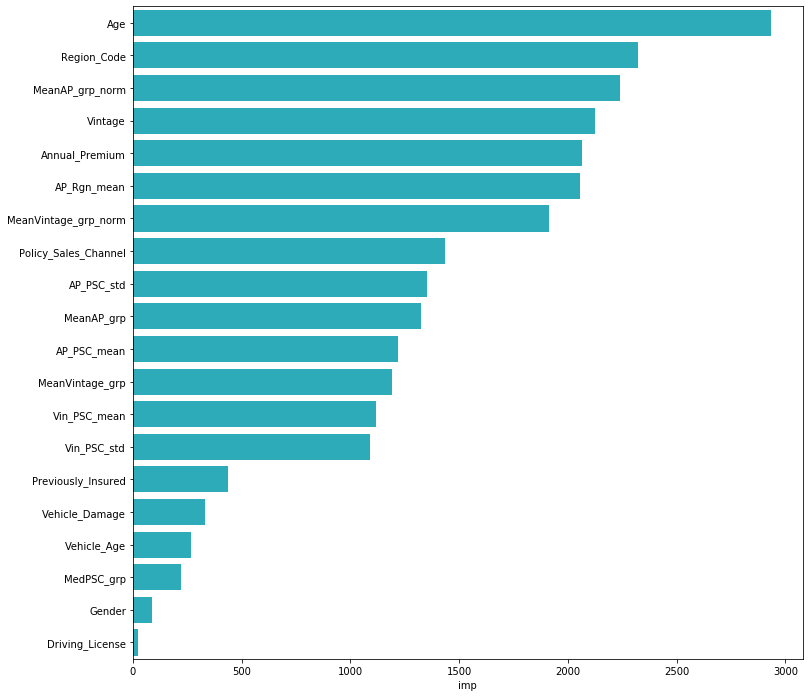

In [99]:
feature_imp=pd.DataFrame(model.feature_importances_,X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False),
            color=color[9])
plt.show()

In [100]:
pred_lgb=model.predict_proba(X_tst)[:,1]
sub['Response'] = pred_lgb
sub.to_csv('submission.csv', index=False)

In [ ]:
import lightgbm as lgb
lgbm_params =  {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_iteration': 10000,
    'is_enable_sparse': True,
    'tree_learner':'data',
    'min_data_in_leaf': 40,
    'max_depth': 25,
    'max_bin': 255,
    'subsample_for_bin':5000,
    'metric': 'auc',
    'learning_rate': 0.02,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.2,
    'min_child_samples': 10,
    'reg_lambda': 0.01,
    'subsample':0.5,
    'subsample_freq':1,
    'min_split_gain': 1,
    'colsample_bytree':0.5,
    'min_child_weight': 1,
    'seed':41,'nthread':-1,
    'silent':True}

# LGBM Dataset
lgtrain = lgb.Dataset(X_train,label=y_train)

In [ ]:
N_FOLDS = 5
MAX_BOOST_ROUNDS = 300

cv_results = lgb.cv(lgbm_params, lgtrain, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, stratified=True,
                    verbose_eval=10, early_stopping_rounds=60,eval_train_metric=True,show_stdv=False)

In [ ]:
model_lgb = lgb.train(lgbm_params, lgtrain, num_boost_round=300)

In [ ]:
print("AUC on training set:",AUC(y_train, model_lgb.predict(X_train)))
print("AUC on validation set:",AUC(y_valid, model_lgb.predict(X_valid)))

In [ ]:
feature_imp=pd.DataFrame(model_lgb.feature_importance(),X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",
            y=feature_imp.sort_values('imp', ascending=False).index,
            data= feature_imp.sort_values('imp', ascending=False),
            color=color[9])
plt.show()